<a href="https://colab.research.google.com/github/senhajiboutayna/Detection-of-Phishing-Attacks-with-AI-and-NLP/blob/main/models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index(['num_urls', 'suspicious_urls', 'sender_name_length', 'phishing_words',
       'special_char_density', 'sender_domain_encoded',
       'receiver_domain_encoded', 'label'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:04:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.9856
XGBoost - ROC AUC: 0.9976


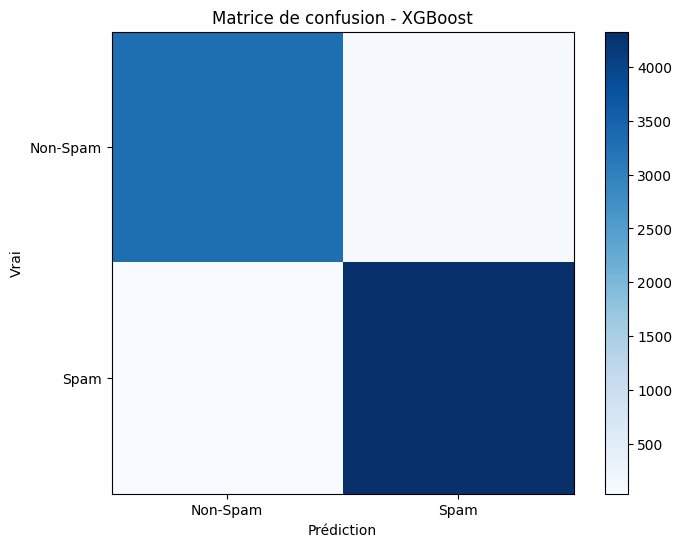

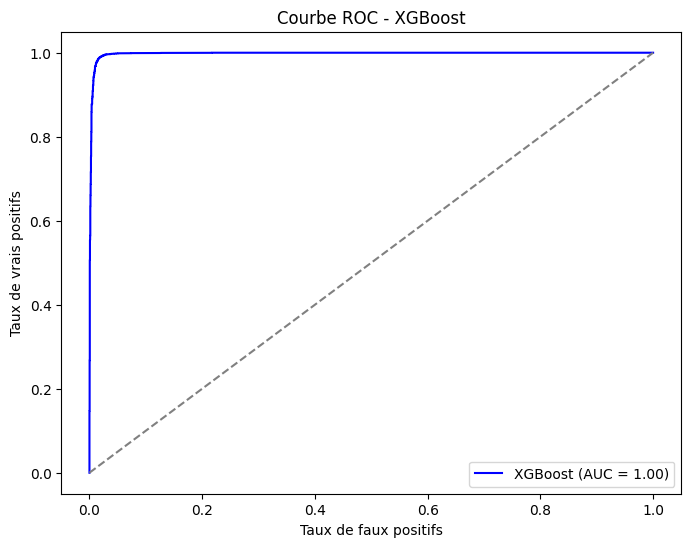

NaN dans X_train: sender_name_length         0
special_char_density       0
sender_domain_encoded      0
num_urls                   0
suspicious_urls            0
phishing_words             0
receiver_domain_encoded    0
dtype: int64
NaN dans X_test: sender_name_length         0
special_char_density       0
sender_domain_encoded      0
num_urls                   0
suspicious_urls            0
phishing_words             0
receiver_domain_encoded    0
dtype: int64
NaN dans y_train: 0
NaN dans y_test: 0
SVM - Accuracy: 0.8284
SVM - ROC AUC: 0.7167


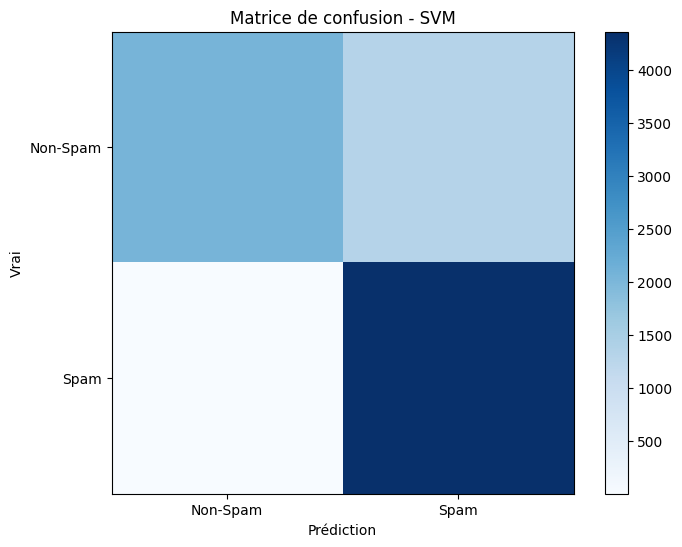

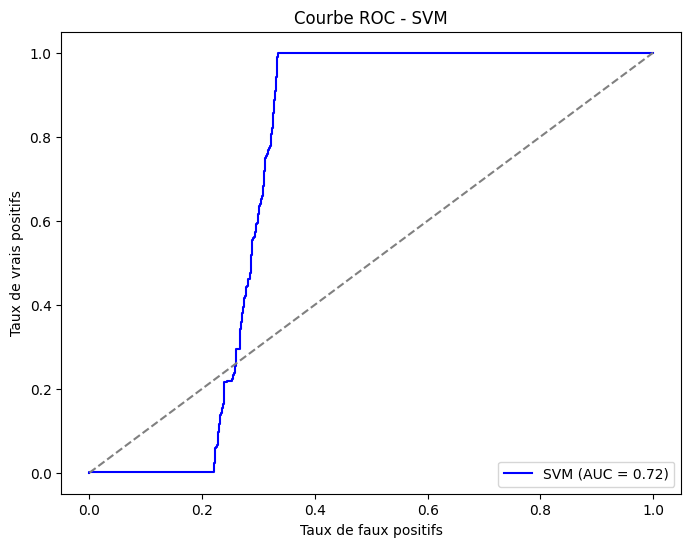

Random Forest - Accuracy: 0.9753
Random Forest - ROC AUC: 0.9867


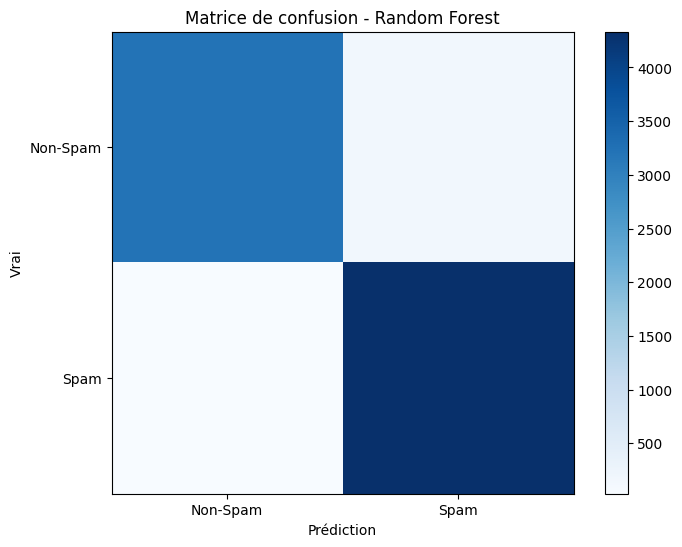

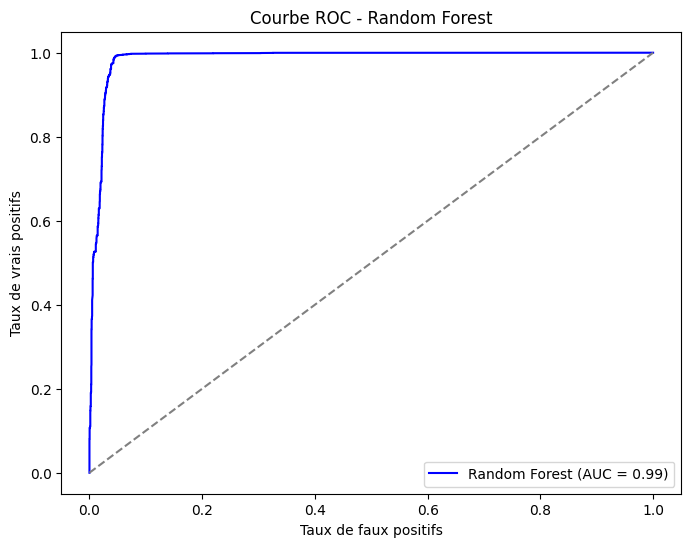

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.preprocessing import MinMaxScaler


file_path = '/content/sample_data/cleaned_phishing_data.csv'
data = pd.read_csv(file_path)


print(data.columns)


features = ['sender_name_length', 'special_char_density', 'sender_domain_encoded','num_urls','suspicious_urls','phishing_words','receiver_domain_encoded']
X = data[features]


y = data['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = MinMaxScaler()
X_train[['sender_name_length', 'special_char_density']] = scaler.fit_transform(X_train[['sender_name_length', 'special_char_density']])
X_test[['sender_name_length', 'special_char_density']] = scaler.transform(X_test[['sender_name_length', 'special_char_density']])

# ------------------------------ XGBoost Model ------------------------------

xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', n_estimators=100, max_depth=6)
xgb_model.fit(X_train, y_train)


y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

print(f"XGBoost - Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost - ROC AUC: {roc_auc_xgb:.4f}")

cm = confusion_matrix(y_test, y_pred_xgb)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_xgb)


plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matrice de confusion - XGBoost")
plt.colorbar()
plt.ylabel('Vrai')
plt.xlabel('Prédiction')
plt.xticks([0, 1], ['Non-Spam', 'Spam'])
plt.yticks([0, 1], ['Non-Spam', 'Spam'])
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC - XGBoost')
plt.legend(loc="lower right")
plt.show()

# ------------------------------ SVM Model ------------------------------
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Vérification des NaN dans les données d'entrée
print(f"NaN dans X_train: {np.isnan(X_train).sum()}")
print(f"NaN dans X_test: {np.isnan(X_test).sum()}")
print(f"NaN dans y_train: {np.isnan(y_train).sum()}")
print(f"NaN dans y_test: {np.isnan(y_test).sum()}")

# Si des NaN existent dans les données, vous pouvez les gérer en les remplissant par 0
X_train = np.nan_to_num(X_train, nan=0)
X_test = np.nan_to_num(X_test, nan=0)

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)  # 'rbf' est le noyau radial
svm_model.fit(X_train, y_train)


y_pred_svm = svm_model.predict(X_test)
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]

accuracy_svm = accuracy_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)

print(f"SVM - Accuracy: {accuracy_svm:.4f}")
print(f"SVM - ROC AUC: {roc_auc_svm:.4f}")


cm_svm = confusion_matrix(y_test, y_pred_svm)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)


plt.figure(figsize=(8, 6))
plt.imshow(cm_svm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matrice de confusion - SVM")
plt.colorbar()
plt.ylabel('Vrai')
plt.xlabel('Prédiction')
plt.xticks([0, 1], ['Non-Spam', 'Spam'])
plt.yticks([0, 1], ['Non-Spam', 'Spam'])
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC - SVM')
plt.legend(loc="lower right")
plt.show()

# ------------------------------RandomForest Model ------------------------------

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt


rf_model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]


accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print(f"Random Forest - Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest - ROC AUC: {roc_auc_rf:.4f}")


cm_rf = confusion_matrix(y_test, y_pred_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)


plt.figure(figsize=(8, 6))
plt.imshow(cm_rf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matrice de confusion - Random Forest")
plt.colorbar()
plt.ylabel('Vrai')
plt.xlabel('Prédiction')
plt.xticks([0, 1], ['Non-Spam', 'Spam'])
plt.yticks([0, 1], ['Non-Spam', 'Spam'])
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC - Random Forest')
plt.legend(loc="lower right")
plt.show()



In [ ]:
models = ['XGBoost', 'SVM', 'Random Forest']
accuracies = [accuracy_xgb, accuracy_svm, accuracy_rf]
roc_aucs = [roc_auc_xgb, roc_auc_svm, roc_auc_rf]


results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'ROC AUC': roc_aucs
})

print(results_df)

           Model  Accuracy   ROC AUC
0        XGBoost  0.985642  0.997637
1            SVM  0.828353  0.716678
2  Random Forest  0.975294  0.986656


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:08:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Stacking - Accuracy: 0.9858
Stacking - ROC AUC: 0.9972


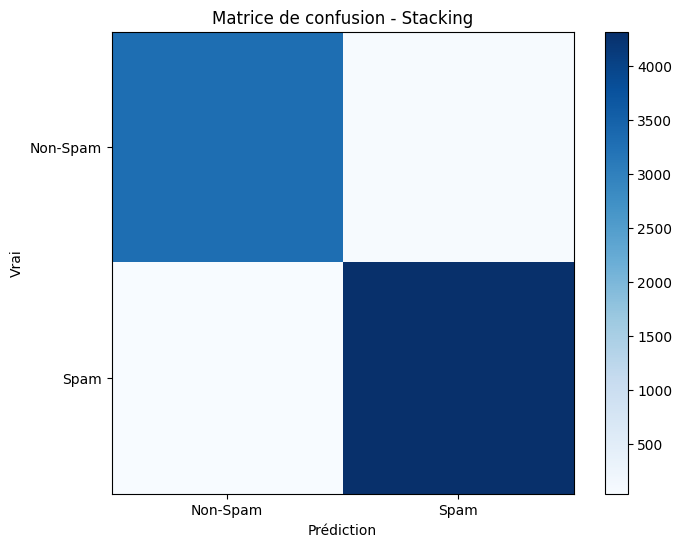

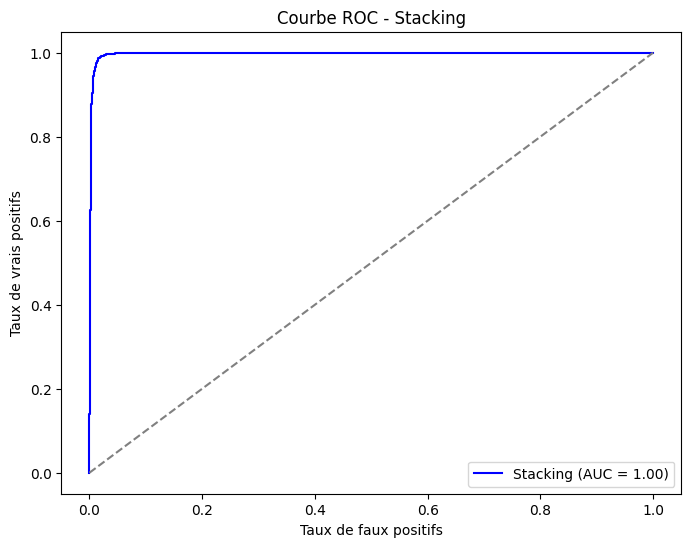

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


file_path = '/content/sample_data/cleaned_phishing_data.csv'
data = pd.read_csv(file_path)


features = ['sender_name_length', 'special_char_density', 'sender_domain_encoded','num_urls','suspicious_urls','phishing_words','receiver_domain_encoded']
X = data[features]
y = data['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = MinMaxScaler()
X_train[['sender_name_length', 'special_char_density']] = scaler.fit_transform(X_train[['sender_name_length', 'special_char_density']])
X_test[['sender_name_length', 'special_char_density']] = scaler.transform(X_test[['sender_name_length', 'special_char_density']])

# ------------------------------ Modèles de base ------------------------------

xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', n_estimators=100, max_depth=6)
xgb_model.fit(X_train, y_train)


svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)  # 'rbf' est le noyau radial
svm_model.fit(X_train, y_train)


rf_model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
rf_model.fit(X_train, y_train)

# ------------------------------ Création de l'ensemble de features pour le stacking ------------------------------

y_pred_xgb_train = xgb_model.predict_proba(X_train)[:, 1]
y_pred_svm_train = svm_model.predict_proba(X_train)[:, 1]
y_pred_rf_train = rf_model.predict_proba(X_train)[:, 1]


X_train_stack = np.column_stack((y_pred_xgb_train, y_pred_svm_train, y_pred_rf_train))


meta_model = LogisticRegression()
meta_model.fit(X_train_stack, y_train)

# ------------------------------ Test du modèle de stacking ------------------------------

y_pred_xgb_test = xgb_model.predict_proba(X_test)[:, 1]
y_pred_svm_test = svm_model.predict_proba(X_test)[:, 1]
y_pred_rf_test = rf_model.predict_proba(X_test)[:, 1]


X_test_stack = np.column_stack((y_pred_xgb_test, y_pred_svm_test, y_pred_rf_test))


y_pred_stack = meta_model.predict(X_test_stack)
y_pred_proba_stack = meta_model.predict_proba(X_test_stack)[:, 1]


accuracy_stack = accuracy_score(y_test, y_pred_stack)
roc_auc_stack = roc_auc_score(y_test, y_pred_proba_stack)

print(f"Stacking - Accuracy: {accuracy_stack:.4f}")
print(f"Stacking - ROC AUC: {roc_auc_stack:.4f}")


cm_stack = confusion_matrix(y_test, y_pred_stack)
fpr_stack, tpr_stack, _ = roc_curve(y_test, y_pred_proba_stack)


plt.figure(figsize=(8, 6))
plt.imshow(cm_stack, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matrice de confusion - Stacking")
plt.colorbar()
plt.ylabel('Vrai')
plt.xlabel('Prédiction')
plt.xticks([0, 1], ['Non-Spam', 'Spam'])
plt.yticks([0, 1], ['Non-Spam', 'Spam'])
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(fpr_stack, tpr_stack, color='blue', label=f'Stacking (AUC = {roc_auc_stack:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC - Stacking')
plt.legend(loc="lower right")
plt.show()
